In [1]:
import potential
from potential import Aziz_params
from graphenetools import GrapheneTools as gt
import sys,os

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib.gridspec as gridspec
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)
%matplotlib inline

In [ ]:
He_He_V_MP2 = np.loadtxt('He_He_MP2.csv', delimiter = ',', skiprows = 1)
He_Graphene_V_MP2 = np.loadtxt('He_Graphene_MP2.csv', delimiter = ',', skiprows = 1)

In [3]:
He_He_V_dat = np.loadtxt('He_He_V.csv', delimiter = ',', skiprows = 1)
He_Graphene_1_dat = np.loadtxt('Single_He_Graphene_V.csv', delimiter = ',', skiprows = 1)
He_barrier_dat = np.loadtxt('Single_He_opt_V_moving_over_barrier.csv', delimiter = ',', skiprows = 1)
He_Graphite_dat = np.loadtxt('He_Graphite_3.txt', skiprows = 1)

In [4]:
sigmaHapp = 2.643
epsilonHapp = 16.961

sigma1 = 2.74
epsilon1 = 16.2463

a = gt(notebook=True, strain=0.0)

zz = He_Graphene_1_dat[:,0]
V = a.V_0(zz, a.lattice.A, epsilonHapp, sigmaHapp)

zz = He_Graphene_1_dat[:,0]
V_Graphite_1 = a.V_0(zz, a.lattice.A, epsilon1, sigma1)

z_Graphite_Composite = He_Graphite_dat[:, 0]
V_Graphite_Composite = He_Graphite_dat[:, 1]

z_MP2 = He_He_V_MP2[:, 0]
V_MP2 = He_He_V_MP2[:, 1]

z_G_MP2 = He_Graphene_V_MP2[:, 0]
V_G_MP2 = He_Graphene_V_MP2[:, 1]

szalewicz_V = potential.szalewicz_2012(He_He_V_dat[:,0])
aziz_95_V = potential.aziz(He_He_V_dat[:,0], Aziz_params['1995'])

In [5]:
Aziz_params['1995']

{'ε': 10.956,
 'rₘ': 2.9683,
 'D': 1.438,
 'α': 10.5717543,
 'β': -2.07758779,
 'C': array([0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 1.35186623, 0.        , 0.4149514 , 0.        ,
        0.17151143]),
 'A': 186924.404}

In [6]:
plt.style.use('../aps.mplstyle')

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


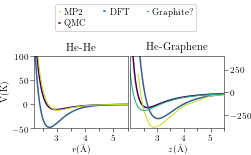

In [7]:
cmap = plt.cm.get_cmap('viridis')

colors = [cmap(i*0.3) for i in range(4)]

fig, ax = plt.subplots(1, 2) 
ax[0].plot(He_He_V_dat[:,0], szalewicz_V, color = colors[0])
ax[0].plot(He_He_V_dat[:,0], He_He_V_dat[:,2], color = colors[1])
ax[0].plot(z_MP2, V_MP2, label = 'MP2', color = colors[3], linewidth=1)
ax[0].set_xlim(2.2, 5.5)
ax[0].set_ylim(-50,100)
ax[0].set_title("He-He")
ax[0].set_xlabel(r'$r$(\AA)')
ax[0].set_ylabel(r'V(K)')
ax[0].xaxis.set_minor_locator(MultipleLocator(0.5))
ax[0].tick_params(which='minor', direction="out", top = False, bottom=True, left=False, right=True, labelleft = False,
                                   labelright = True, length=2.5)
ax[0].tick_params(which='major', direction="out", top = False, bottom=True, left=True, right=False, length=4)


ax[1].plot(zz,V, label = 'QMC', color = colors[0])
ax[1].plot(He_Graphene_1_dat[:,0], He_Graphene_1_dat[:,2], label = 'DFT', color = colors[1])
#ax[1].plot(zz,V1, label = 'Graphite')
ax[1].plot(z_G_MP2, V_G_MP2, color = colors[3], linewidth=1)
#ax[1].plot(z_Graphite_Composite,V_Graphite_Composite, label = 'Graphite?', color = colors[2], linewidth=1)
ax[1].set_xlim(2.01, 5.5)
ax[1].set_ylim(-400,400)
ax[1].yaxis.set_label_position("right")
ax[1].set_title("He-Graphene")
ax[1].set_xlabel(r'$z$(\AA)')
ax[1].xaxis.set_minor_locator(MultipleLocator(0.5))
ax[1].tick_params(which='minor', direction="out", top = False, bottom=True, left=False, right=True, labelleft = False,
                                   labelright = True, length=2.5)
ax[1].tick_params(which='major', direction="out", top = False, bottom=True, left=False, right=True, labelleft = False,
                                   labelright = True, length=4)

fig.subplots_adjust(wspace=0.03, top=0.6)

handles, labels = ax[0].get_legend_handles_labels()
handles2, labels2 = ax[1].get_legend_handles_labels()
handles.extend(handles2)
labels.extend(labels2)
fig.legend(handles, labels, loc='upper center', frameon = True, ncol=3)


#plt.legend()
#plt.show()

#plt.savefig('He_Graphene_Potential.pdf', transparent=False) 
#plt.savefig('He_Graphene_Potential.svg', transparent=False) 

In [15]:
np.shape(He_He_V_dat)

(99, 3)

In [16]:
np.shape(He_Graphene_1_dat)

(81, 3)

In [8]:
np.min(V_Graphite_Composite)

-203.25454605166576

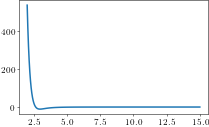

In [9]:
plt.plot(He_He_V_dat[:,0], szalewicz_V)

In [10]:
np.where(szalewicz_V<0)

(array([13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29,
        30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46,
        47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63,
        64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80,
        81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97,
        98], dtype=int64),)

In [11]:
He_He_r = np.linspace(2,3,1000)
szalewicz_V1 = potential.szalewicz_2012(He_He_r)
np.where(szalewicz_V1<0)

(array([641, 642, 643, 644, 645, 646, 647, 648, 649, 650, 651, 652, 653,
        654, 655, 656, 657, 658, 659, 660, 661, 662, 663, 664, 665, 666,
        667, 668, 669, 670, 671, 672, 673, 674, 675, 676, 677, 678, 679,
        680, 681, 682, 683, 684, 685, 686, 687, 688, 689, 690, 691, 692,
        693, 694, 695, 696, 697, 698, 699, 700, 701, 702, 703, 704, 705,
        706, 707, 708, 709, 710, 711, 712, 713, 714, 715, 716, 717, 718,
        719, 720, 721, 722, 723, 724, 725, 726, 727, 728, 729, 730, 731,
        732, 733, 734, 735, 736, 737, 738, 739, 740, 741, 742, 743, 744,
        745, 746, 747, 748, 749, 750, 751, 752, 753, 754, 755, 756, 757,
        758, 759, 760, 761, 762, 763, 764, 765, 766, 767, 768, 769, 770,
        771, 772, 773, 774, 775, 776, 777, 778, 779, 780, 781, 782, 783,
        784, 785, 786, 787, 788, 789, 790, 791, 792, 793, 794, 795, 796,
        797, 798, 799, 800, 801, 802, 803, 804, 805, 806, 807, 808, 809,
        810, 811, 812, 813, 814, 815, 816, 817, 818

In [12]:
He_He_r[642]

2.6426426426426426